In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gitawallpaper/bhagavad-gita-wallpaper.jpg


In [7]:
import cv2

In [10]:
original_image = cv2.imread("/kaggle/input/gitawallpaper/bhagavad-gita-wallpaper.jpg")

In [11]:
original_image

array([[[ 65,  25,   6],
        [ 65,  25,   6],
        [ 65,  25,   6],
        ...,
        [251, 247, 246],
        [250, 245, 244],
        [249, 244, 243]],

       [[ 65,  25,   6],
        [ 65,  25,   6],
        [ 65,  25,   6],
        ...,
        [251, 247, 246],
        [250, 245, 244],
        [249, 244, 243]],

       [[ 65,  25,   6],
        [ 65,  25,   6],
        [ 65,  25,   6],
        ...,
        [251, 247, 246],
        [250, 245, 244],
        [248, 243, 242]],

       ...,

       [[ 88, 170, 182],
        [ 77, 160, 175],
        [ 65, 150, 166],
        ...,
        [198, 188, 128],
        [198, 188, 128],
        [198, 188, 128]],

       [[ 98, 180, 192],
        [ 84, 167, 182],
        [ 68, 153, 169],
        ...,
        [198, 188, 128],
        [198, 188, 128],
        [198, 188, 128]],

       [[105, 187, 199],
        [ 89, 172, 187],
        [ 71, 156, 172],
        ...,
        [198, 188, 128],
        [198, 188, 128],
        [198, 188, 128]]

We need to convert our image from RGB Colours Space to HSV

According to wikipedia the R, G, and B components of an object’s color in a digital image are all correlated with the amount of light hitting the object, and therefore with each other, image descriptions in terms of those components make object discrimination difficult. Descriptions in terms of hue/lightness/chroma or hue/lightness/saturation are often more relevant.

In [12]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

 converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.

In [13]:
vectorized = img.reshape((-1,3))

We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [14]:
vectorized = np.float32(vectorized)

We are going to cluster with k = 3 because if you look at the image above it has 3 colors, green-colored grass and forest, blue sea and the greenish-blue seashore.

Define criteria, number of clusters(K) and apply k-means()

cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [20]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

Now convert back into uint8.

In [21]:
center = np.uint8(center)

we have to access the labels to regenerate the clustered image

In [22]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

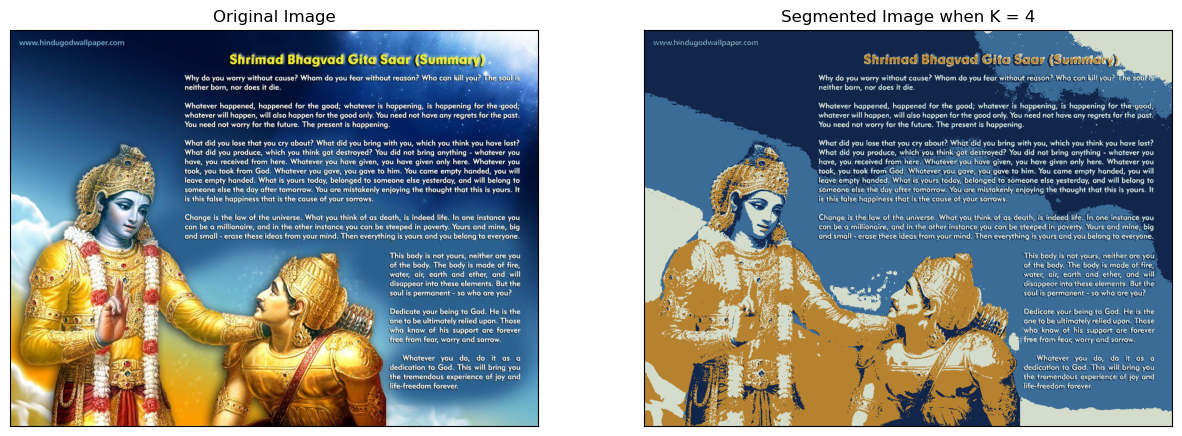

In [23]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()